# Predicting Stock Market Trends with RNN(LSTM)
----- A recurrent neural network is used to process data that is sequential in nature, e.g., stock prices data, text sentences, or sales of items. LSTM - Long Short-Term Memory

In [1]:
#Import libraries needed for analysis
import pandas as pd
import numpy as np

#Import Leidos dataset
leidos_complete_data = pd.read_csv("LDOS_training.csv")


### View the dataset

In [2]:
#View first five rows
leidos_complete_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/31/2022,108.070000,109.400002,107.550003,108.019997,108.019997,932500
1,3/30/2022,107.379997,109.040001,107.370003,108.419998,108.419998,829700
2,3/29/2022,107.760002,108.290001,106.250000,107.360001,107.360001,740800
3,3/28/2022,108.349998,109.349998,107.250000,109.050003,109.050003,564100
4,3/25/2022,107.949997,109.620003,107.099998,108.529999,108.529999,564100


# Data Exploration

In [3]:
"""Need to change Date from object to DateTime datatype"""
leidos_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       233 non-null    object 
 1   Open       233 non-null    float64
 2   High       233 non-null    float64
 3   Low        233 non-null    float64
 4   Close      233 non-null    float64
 5   Adj Close  233 non-null    float64
 6   Volume     233 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.9+ KB


In [4]:
#Change 
leidos_complete_data['Date'] = leidos_complete_data['Date'].astype('datetime64[ns]')

In [5]:
leidos_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       233 non-null    datetime64[ns]
 1   Open       233 non-null    float64       
 2   High       233 non-null    float64       
 3   Low        233 non-null    float64       
 4   Close      233 non-null    float64       
 5   Adj Close  233 non-null    float64       
 6   Volume     233 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.9 KB


In [6]:
leidos_complete_data.shape

(233, 7)

In [7]:
leidos_complete_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,233.000000,233.000000,233.000000,233.000000,233.000000,2.330000e+02
mean,97.702403,98.766695,96.677983,97.750043,96.966896,8.359858e+05
std,6.394104,6.281890,6.448073,6.385515,6.193879,4.879494e+05
min,82.529999,85.040001,81.070000,84.440002,84.141891,2.509000e+05
25%,92.239998,93.320000,91.029999,92.230003,91.773529,5.377000e+05
50%,97.820000,98.830002,96.900002,97.889999,96.964783,7.043000e+05
75%,103.400002,104.260002,102.330002,103.440002,102.215622,9.414000e+05
max,108.349998,109.620003,107.550003,109.050003,109.050003,3.922800e+06


In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
import math

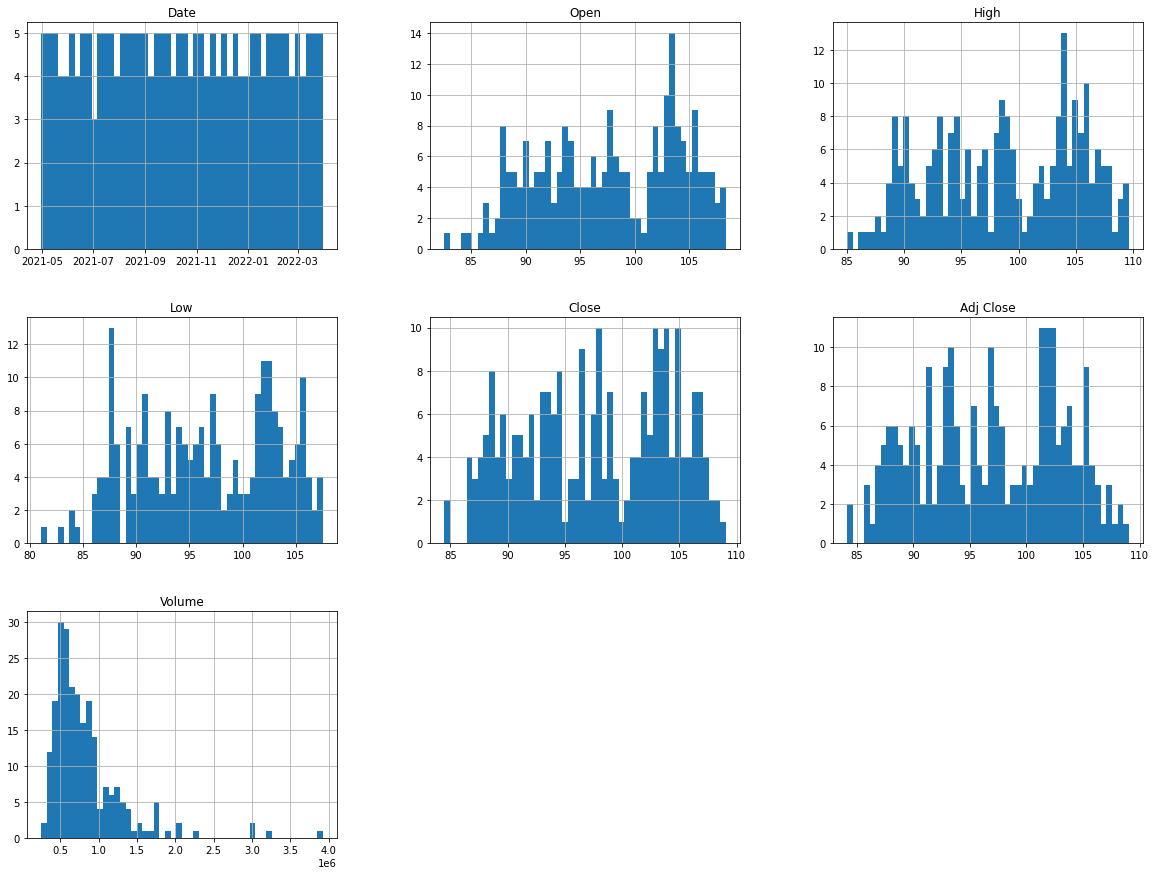

In [9]:
#Create histograms
%matplotlib inline
leidos_complete_data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Open', ylabel='Count'>

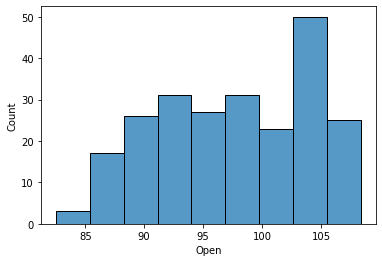

In [10]:
sns.histplot(leidos_complete_data['Open'])

In [11]:
#Only need the "Open column for the analysis code will seperate it from the rest of the table
leidos_training_processed = leidos_complete_data[['Open']].values

In [12]:
#scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

leidos_training_scaled = scaler.fit_transform(leidos_training_processed)

In [13]:
len(leidos_training_scaled)

233

In [14]:
#training features contained data of last 60 days
#training labels contain data of 61st day

leidos_training_features= []
leidos_training_labels = []
for i in range(60, len(leidos_training_scaled)):
    leidos_training_features.append(leidos_training_scaled[i-60:i,0])
    leidos_training_labels.append(leidos_training_scaled[i, 0])

In [15]:
#converting training data to numpy arrays
x_train = np.array(leidos_training_features)
y_train = np.array(leidos_training_labels)

In [16]:
#Check shape of training sets
print(x_train.shape)
print(y_train.shape)

(173, 60)
(173,)


In [17]:
# converting data into 3D shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
#importing libraries
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [19]:
#defining the LSTM network

input_layer = Input(shape = (x_train.shape[1], 1))
lstm1 = LSTM(100, activation= 'relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')


In [20]:
print(x_train.shape)
print(y_train.shape)
y_train= y_train.reshape(-1,1)
print(y_train.shape)

(173, 60, 1)
(173,)
(173, 1)


In [21]:
#training the model
model_history = model.fit(x_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
6/6 [==============================] - 4s 106ms/step - loss: 0.3496
Epoch 2/100
6/6 [==============================] - 1s 122ms/step - loss: 0.0780
Epoch 3/100
6/6 [==============================] - 1s 112ms/step - loss: 0.0578
Epoch 4/100
6/6 [==============================] - 1s 99ms/step - loss: 0.0383
Epoch 5/100
6/6 [==============================] - 1s 126ms/step - loss: 0.0317
Epoch 6/100
6/6 [==============================] - 1s 121ms/step - loss: 0.0334
Epoch 7/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0286
Epoch 8/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0295
Epoch 9/100
6/6 [==============================] - 1s 107ms/step - loss: 0.0269
Epoch 10/100
6/6 [==============================] - 1s 114ms/step - loss: 0.0257
Epoch 11/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0255
Epoch 12/100
6/6 [==============================] - 1s 98ms/step - loss: 0.0254
Epoch 13/100
6/6 [========================

In [22]:
#Load testing dataset, prices for April
leidos_testing_complete_data = pd.read_csv("LDOS_test.csv")
leidos_testing_processed = leidos_testing_complete_data[['Open']].values

In [23]:
leidos_all_data = pd.concat((leidos_complete_data['Open'], leidos_testing_complete_data['Open']), axis=0)

In [24]:
print(leidos_all_data.shape)

(486,)


In [25]:
test_inputs = leidos_all_data [len(leidos_all_data) - len(leidos_testing_complete_data) - 60:].values
print(test_inputs.shape)

(313,)


In [26]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(313, 1)


In [27]:
leidos_test_features =[]
for i in range(60, 80):
    leidos_test_features.append(test_inputs[i-60:i, 0])

In [28]:
x_test = np.array(leidos_test_features)
print(x_test.shape)

(20, 60)


In [29]:
#Converting test data into 3D shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(20, 60, 1)


In [30]:
#make predictions on test set
y_pred = model.predict(x_test)

In [31]:
#converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

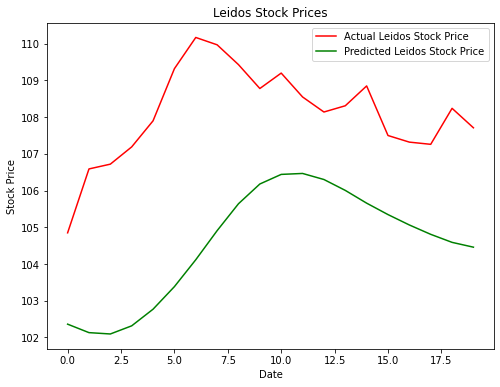

In [32]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(leidos_testing_processed, color='red', label='Actual Leidos Stock Price')
plt.plot(y_pred, color='green', label='Predicted Leidos Stock Price')
plt.title('Leidos Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [33]:
"""Findings:RNN(LSTM) was able to capture the general trend of Leidos future stock prices

"""

'Findings:RNN(LSTM) was able to capture the general trend of Leidos future stock prices\n\n'